# **LGM- Task 02**

# **BEGINNER LEVEL TASK**
# **2) Stock Market Prediction And Forecasting Using Stacked LSTM**

# **Importing Necessary Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# **Data** **Preprocessing**

In [2]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
dataframe.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
#Sort the dataset according to the date
#dataframe['Date'] = pd.to_datetime(dataframe['Date'])
df = dataframe.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# **Making Index in Order**

In [6]:
df.reset_index(inplace=True)

In [7]:
#checking ordered index
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
max_value_column = df["Close"].max()
max_value_column

325.75

In [9]:
min_value_column = df["Close"].min()
min_value_column

80.95

# **# Plotting the graph of stocks at Close**

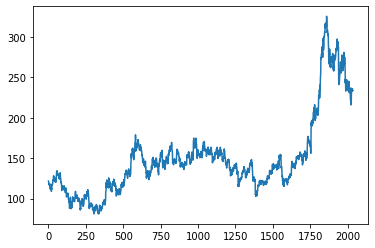

In [10]:
plt.plot(df['Close'])

In [11]:
df1 = df['Close']

# **Feature Scaling**

In [12]:
scaler = MinMaxScaler(feature_range=(-1,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[-0.66830065],
       [-0.67361111],
       [-0.67565359],
       ...,
       [ 0.25245098],
       [ 0.24428105],
       [ 0.24836601]])

# **Splitting the data into training and test sets**

In [13]:
training_size = int(len(df1)*0.75)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

training_size, test_size

(1526, 509)

In [14]:
#converting an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [16]:
print(X_train.shape)
print(y_train.shape)

(1425, 100)
(1425,)


In [17]:
#Reshaping input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
21/21 [==============================] - 11s 244ms/step - loss: 0.0798 - val_loss: 0.0038
Epoch 2/60
21/21 [==============================] - 4s 168ms/step - loss: 0.0093 - val_loss: 0.0046
Epoch 3/60
21/21 [==============================] - 4s 172ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 4/60
21/21 [==============================] - 4s 175ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 5/60
21/21 [==============================] - 4s 181ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 6/60
21/21 [==============================] - 4s 178ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 7/60
21/21 [==============================] - 5s 223ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 8/60
21/21 [==============================] - 4s 174ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 9/60
21/21 [==============================] - 4s 170ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 10/60
21/21 [==============================] - 4s 179ms/step - loss: 0.0030 - val_loss: 0.002

In [21]:
#Prediction of scaled test set
test_predict = model.predict(X_test)

In [22]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [23]:
test_predict1

array([[134.89957],
       [138.66023],
       [140.89995],
       [142.61392],
       [143.19829],
       [142.95618],
       [141.89723],
       [140.47882],
       [138.73007],
       [137.5977 ],
       [137.3024 ],
       [137.99596],
       [139.14595],
       [139.87288],
       [139.9388 ],
       [139.53067],
       [138.79065],
       [139.36809],
       [140.1254 ],
       [141.15242],
       [142.03221],
       [142.4329 ],
       [142.10875],
       [141.27805],
       [139.53215],
       [138.20435],
       [137.95332],
       [139.34676],
       [141.38135],
       [143.50299],
       [144.95679],
       [144.9908 ],
       [145.95703],
       [147.36453],
       [148.09138],
       [148.52242],
       [148.7415 ],
       [148.72047],
       [148.65764],
       [148.89902],
       [149.4738 ],
       [150.2139 ],
       [150.40321],
       [150.23448],
       [150.42293],
       [150.56184],
       [150.36035],
       [149.77008],
       [148.82799],
       [148.32437],


# **Performance Metrics**


Mean Square Error

In [25]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low

0.23567379391265286

# **Conclusion**
This proves that using this Keras model with Stacked LSTM Layers Combined with Dropouts can provide us with 98% training accuracy and 89% test set accuracy which is pretty good for a Stock Prediction model.